**Simple Linear Regression**: It is a statistical method used to model the relationship between two continuos variable. The goal is to describe this relationship with linear equation.

*Linear equation:* Y = mX + C + E

where:


*   Y = dependent variable
*   X = independent variable
*   m = slope of the line
*   C = intercept
*   E = Error term(difference between predicted and actual)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
placement = pd.read_csv('/content/placement.csv')
df = placement.copy()

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [12]:
# Shape of data
df.shape

(200, 2)

Text(0, 0.5, 'package in lpa')

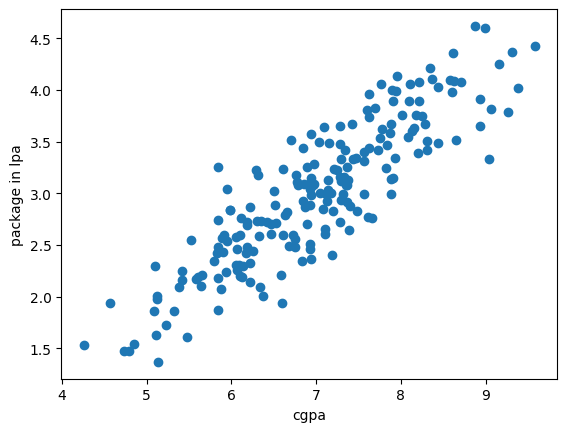

In [6]:
# Plotting scatter plot to see the relationship of data
plt.scatter(df['cgpa'], df['package'])
plt.xlabel('cgpa')
plt.ylabel('package in lpa')

<Axes: xlabel='cgpa', ylabel='package'>

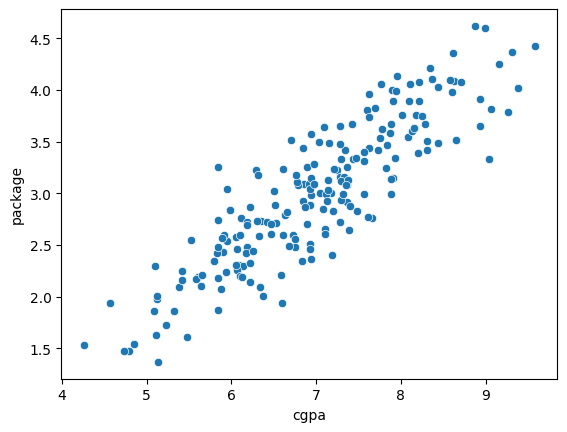

In [9]:

# Using seaborn library

sns.scatterplot(x = 'cgpa', y = 'package', data = df)

In [10]:
# Input
X = df.iloc[:, 0:1]

# Output
y = df.iloc[:,-1]

In [14]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [15]:
# import train_test_split from sklearn library

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [16]:
# Make a object

lr = LinearRegression()

In [17]:
# Fit model
lr.fit(X_train, y_train)

LinearRegression()

In [18]:
X_test

,cgpa
95,6.63
15,7.25
30,7.36
158,5.95
128,7.93
115,8.35
69,7.30
170,6.22
174,7.32
45,7.87


In [19]:
y_test

95     2.79
15     3.23
30     3.26
158    3.04
128    3.34
115    4.21
69     2.94
170    2.87
174    2.99
45     3.58
66     1.63
182    2.08
165    4.08
78     2.21
186    3.47
177    3.64
56     2.74
152    3.08
82     2.17
68     2.99
124    2.31
16     2.35
148    3.40
93     3.08
65     3.81
60     2.19
84     1.53
67     2.89
125    3.16
132    2.48
9      3.51
18     2.98
55     3.39
75     3.28
150    2.73
104    3.74
135    2.60
137    3.13
164    3.82
76     3.15
Name: package, dtype: float64

In [37]:
# Prediction of 1st data(cgpa=6.63)
lr.predict(X_test.iloc[1].values.reshape(1,1))

array([3.13635249])

In [24]:
# Prediction on test data
lr.predict(X_test)

array([2.78031348, 3.13635249, 3.1995207 , 2.38981908, 3.52684689,
       3.76803461, 3.16506531, 2.54486832, 3.17655044, 3.4923915 ,
       1.90744364, 2.34962112, 3.6876387 , 2.75734322, 3.47516381,
       3.04447145, 2.32665086, 3.20526327, 2.17734418, 3.314372  ,
       2.45298729, 2.90090734, 3.32011456, 2.87219451, 3.33734226,
       2.19457187, 1.41932564, 2.7114027 , 3.18229301, 2.32665086,
       3.74506435, 2.95833298, 3.68189614, 2.97556068, 2.59080884,
       3.34882738, 2.47595755, 3.07318428, 4.17575671, 2.95833298])

<Axes: xlabel='cgpa', ylabel='package'>

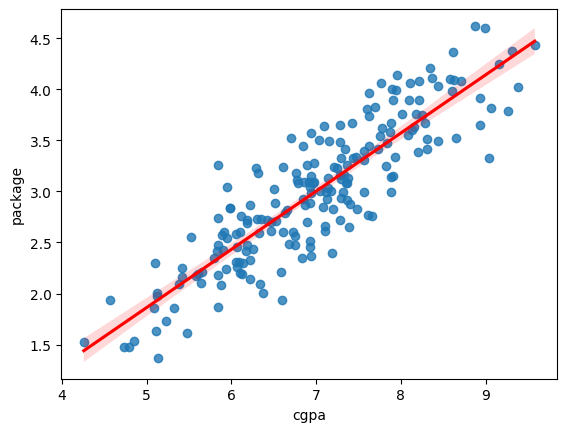

In [27]:
# Best fit line according to model

sns.regplot(x='cgpa', y='package', data=df, line_kws={'color':'red'})

In [35]:
# slope of the line(m value)
m = lr.coef_
m

array([0.57425647])

In [36]:
# Intercept
b = lr.intercept_
b

-1.0270069374542108

In [34]:
# Calculating output using equation of line

m * 6.63 + b

array([2.78031348])

In [28]:
# Importing libraries to know the accuracy and errors by the model

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [29]:
print('MAE', mean_absolute_error(y_test, lr.predict(X_test)))
print('MSE', mean_squared_error(y_test, lr.predict(X_test)))
print('R2 Score', r2_score(y_test, lr.predict(X_test)))

MAE 0.23150985393278373
MSE 0.08417638361329656
R2 Score 0.7730984312051673


R2 score is 0.77, which tells that it is a good model but not the best.